# Data Visualization and Analysis of store sales data in seaborn, ploty, matplotlib

### Perform the Tasks in Seaborn

##### Import the required libraries and data from csv file "sales_data" and perform the following tasks on it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales_data = pd.read_csv("store_sales_data.csv")

sales_data['Total_Sales'] = sales_data['price'] * sales_data['quantity']
sales_data.head()

,order_id,product,category,price,quantity,customer_country,Total_Sales
0,1000,Necklace,Jewelry,189.32,1,Australia,189.32
1,1001,Laptop,Electronics,133.76,4,Australia,535.04
2,1002,Pants,Clothing,42.84,4,Canada,171.36
3,1003,Sunglasses,Accessories,54.85,3,Canada,164.55
4,1004,Pants,Clothing,142.53,5,UK,712.65


#### Plot the total sales per category across all orders.

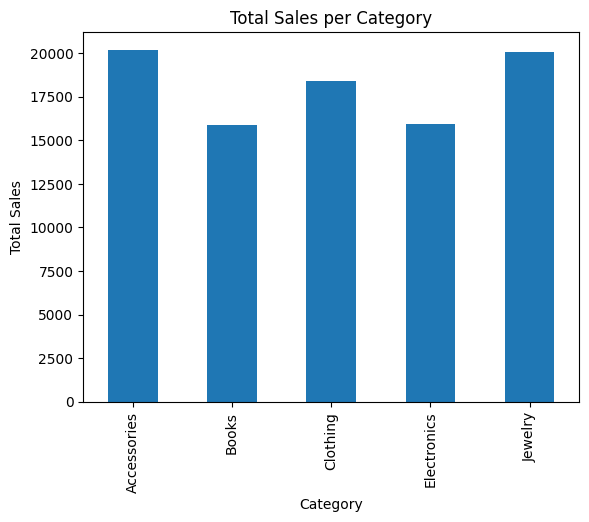

In [3]:
total_sales_per_category = sales_data.groupby('category')['Total_Sales'].sum()
total_sales_per_category.plot(kind='bar')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

#### Visualize the relationship between product price and quantity sold. Add a regression line to show the general trend.

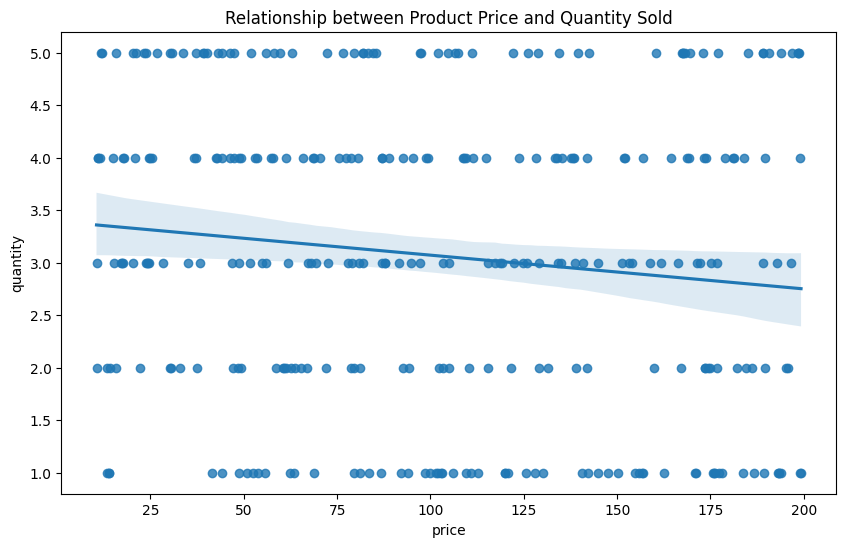

In [4]:
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='quantity', data=sales_data)
plt.title('Relationship between Product Price and Quantity Sold')
plt.show()

#### Explore the distribution of product price within each category using violin plots. Group the plots by customer country using a facet grid.

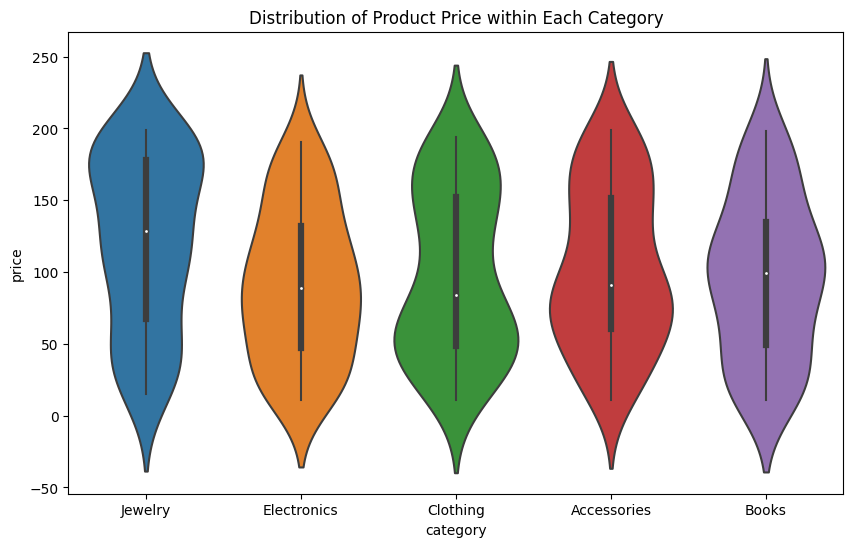

In [5]:
plt.figure(figsize=(10,6))
sns.violinplot(x='category', y='price', data=sales_data)
plt.title('Distribution of Product Price within Each Category')
plt.show()

#### Create a heatmap visualizing the correlation matrix between product price, quantity, and a potential additional numerical variable (e.g., shipping cost, discount applied). Apply hierarchical clustering to order categories and countries based on their correlations.

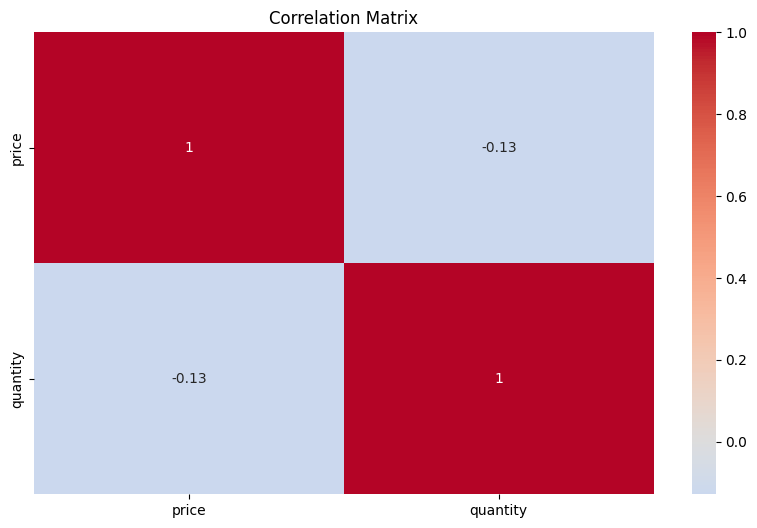

In [6]:
correlation_matrix = sales_data[['price', 'quantity']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Explore the relationships between all numerical variables in your data (price, quantity, shipping cost, etc.) using a pairplot. This provides a quick overview of pairwise correlations and potential outliers.

c:\Users\ST\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


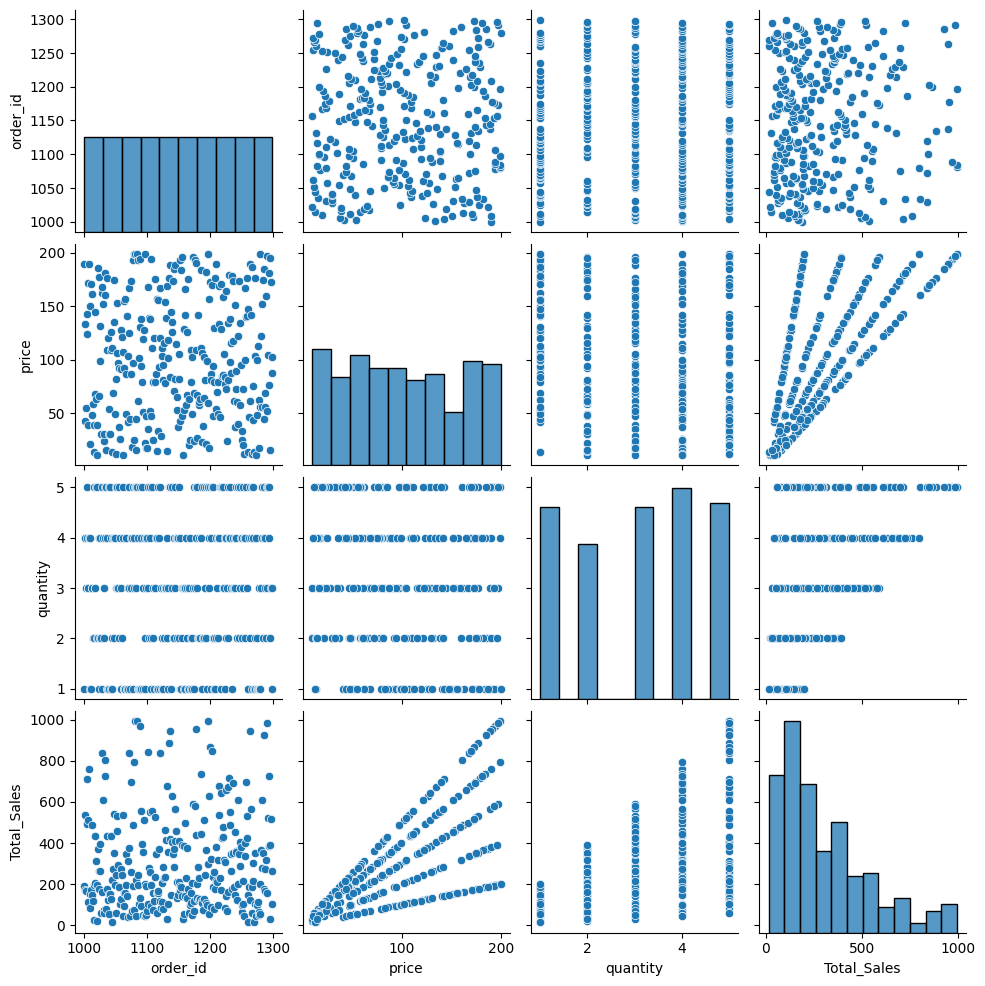

In [7]:
sns.pairplot(sales_data)
plt.show()

### Perform the Tasks in Plotly 

#### Plot the total sales per category using an interactive bar chart where users can hover over bars to see details (category and total sales).

In [8]:
import plotly.express as px

fig = px.bar(total_sales_per_category, x=total_sales_per_category.index, y='Total_Sales', title='Total Sales per Category')
fig.show()

#### Create a scatter plot visualizing the relationship between product price and quantity sold, color-coded by customer country.

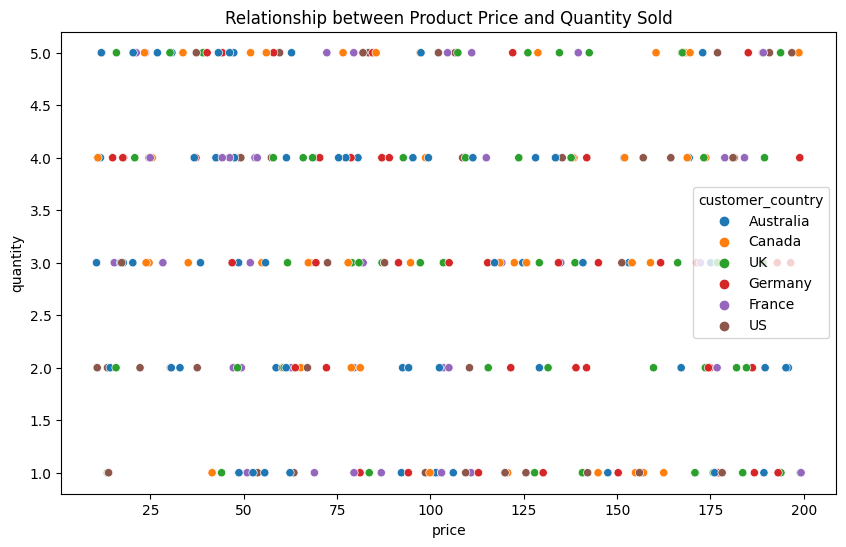

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='quantity', data=sales_data , hue='customer_country')
plt.title('Relationship between Product Price and Quantity Sold')
plt.show()

#### Create a scatter plot visualizing the relationship between product price and quantity sold, color-coded by customer country.

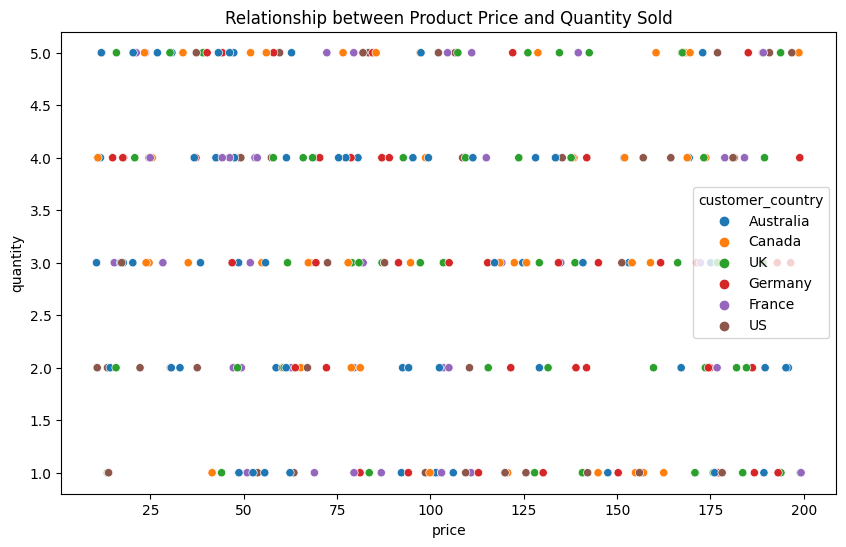

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='quantity', data=sales_data , hue='customer_country')
plt.title('Relationship between Product Price and Quantity Sold')
plt.show()

#### Visualize the average order value per country on a world map, colored by the average value.

In [11]:
average_order_value = sales_data.groupby('customer_country')['Total_Sales'].mean().reset_index()

fig = px.choropleth(average_order_value, locations='customer_country', locationmode='country names', color='Total_Sales', projection='natural earth', title='Average Order Value per Country')
fig.show()

#### Visualize the relationship between product price, quantity sold, and a third numerical variable (e.g., shipping cost) using a 3D scatter plot. Color-code the data points based on the customer country.

In [12]:
fig = px.scatter_3d(sales_data, x='price', y='quantity', z='Total_Sales', color='customer_country', title='Relationship between Product Price, Quantity Sold, and Total Sales')
fig.show()